In [1]:
# import library yang dibutuhkan
import numpy as np
import imageio
import matplotlib.pyplot as plt

In [10]:
img = imageio.imread("fajar.jpeg") # membaca gambar dengan fungsi imageio

C:\Users\asus\AppData\Local\Temp\ipykernel_8620\2389970805.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread("fajar.jpeg")


In [12]:
img_height = img.shape[0] # rincian gambar ketinggian
img_width = img.shape[1] # rincian gambar lebar
img_channel = img.shape[2] # rincian gambar channel/ lapisan

### Inversi

In [13]:
# Menyiapkan piksel kosong untuk rekayasa citra dengan ukuran yang sama dengan ukuran asli
img_inversi = np.zeros(img.shape, dtype=np.uint8)

In [30]:
def inversi_grayscale(nilai):
    # Melakukan iterasi untuk setiap baris (y) dalam gambar
    for y in range(0, img_height):
        # Melakukan iterasi untuk setiap kolom (x) dalam gambar
        for x in range(0, img_width):
            # Mengambil nilai warna merah (red), hijau (green), dan biru (blue) dari gambar pada posisi (y, x)
            red = img[y][x][0]
            green = img[y][x][1]
            blue = img[y][x][2]
            # Menghitung nilai keabuan (gray) dengan menjumlahkan nilai warna merah, hijau, dan biru, lalu membaginya dengan 3
            gray = (int(red) + int(green) + int(blue)) / 3
            # Melakukan inversi nilai keabuan dengan mengurangkan nilai dari parameter (nilai) dengan nilai keabuan (gray)
            gray = nilai - gray
            # Mengatur piksel gambar pada posisi (y, x) dengan nilai keabuan (gray) yang telah diubah
            img_inversi[y][x] = (gray, gray, gray)


In [15]:
def inversi_rgb(nilai):
    # Melakukan iterasi untuk setiap baris (y) dalam gambar
    for y in range(0, img_height):
        # Melakukan iterasi untuk setiap kolom (x) dalam gambar
        for x in range(0, img_width):
            # Mengambil nilai warna merah (red), hijau (green), dan biru (blue) dari gambar pada posisi (y, x)
            red = img[y][x][0]
            green = img[y][x][1]
            blue = img[y][x][2]
            # Melakukan inversi nilai warna merah (red) dengan mengurangkan nilai dari parameter (nilai) dengan nilai warna merah (red)
            red = nilai - red
            # Melakukan inversi nilai warna hijau (green) dengan mengurangkan nilai dari parameter (nilai) dengan nilai warna hijau (green)
            green = nilai - green
            # Melakukan inversi nilai warna biru (blue) dengan mengurangkan nilai dari parameter (nilai) dengan nilai warna biru (blue)
            blue = nilai - blue
            # Mengatur piksel gambar pada posisi (y, x) dengan nilai warna yang telah diubah
            img_inversi[y][x] = (red, green, blue)


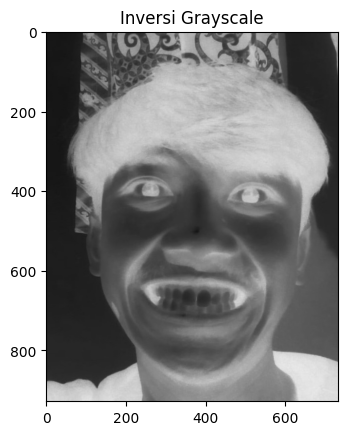

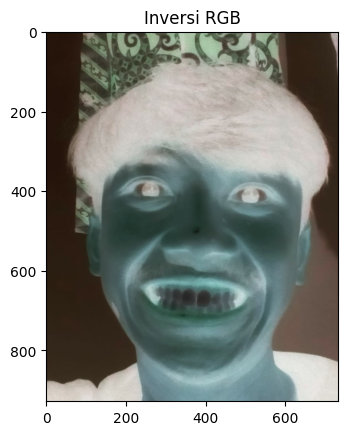

In [16]:
inversi_grayscale(255)  # Memanggil fungsi `inversi_grayscale` dengan parameter input `255` untuk membuat gambar grayscale yang terbalik.
plt.imshow(img_inversi)  # Menampilkan gambar grayscale terbalik menggunakan fungsi `imshow` dari Matplotlib.
plt.title("Inversi Grayscale")  # Mengatur judul plot gambar menjadi "Inversi Grayscale".
plt.show()  # Menampilkan plot gambar.

inversi_rgb(255)  # Memanggil fungsi `inversi_rgb` dengan parameter input `255` untuk membuat gambar RGB yang terbalik.
plt.imshow(img_inversi)  # Menampilkan gambar RGB terbalik menggunakan fungsi `imshow` dari Matplotlib.
plt.title("Inversi RGB")  # Mengatur judul plot gambar menjadi "Inversi RGB".
plt.show()  # Menampilkan plot gambar.


### Log

In [17]:
img_log = np.zeros(img.shape, dtype=np.uint8) # Menyiapkan piksel kosong untuk rekayasa citra dengan ukuran yang sama dengan ukuran asli

In [18]:
def log(c):
    # Melakukan iterasi untuk setiap baris (y) dalam gambar
    for y in range(0, img_height):
        # Melakukan iterasi untuk setiap kolom (x) dalam gambar
        for x in range(0, img_width):
            # Mengambil nilai warna merah (red), hijau (green), dan biru (blue) dari gambar pada posisi (y, x)
            red = img[y][x][0]
            green = img[y][x][1]
            blue = img[y][x][2]
            # Menghitung nilai keabuan (gray) dengan menjumlahkan nilai warna merah, hijau, dan biru, lalu membaginya dengan 3
            gray = (int(red) + int(green) + int(blue)) / 3
            # Melakukan transformasi logaritmik pada nilai keabuan (gray) dengan menggunakan parameter (c) dan fungsi np.log
            gray = int(c * np.log(gray + 1))
            # Memastikan nilai keabuan (gray) tidak melebihi 255
            if gray > 255:
                gray = 255
            # Memastikan nilai keabuan (gray) tidak kurang dari 0
            if gray < 0:
                gray = 0
            # Mengatur piksel gambar pada posisi (y, x) dengan nilai keabuan (gray) yang telah diubah
            img_log[y][x] = (gray, gray, gray)

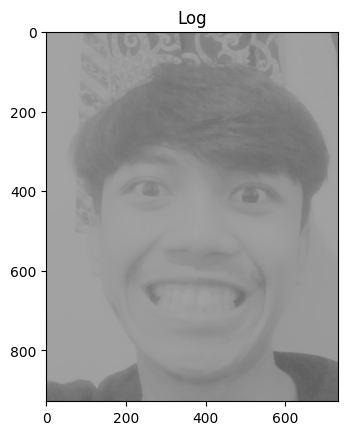

In [20]:
log(30)  # Memanggil fungsi `log` dengan parameter `30` untuk menerapkan transformasi logaritmik pada gambar.
plt.imshow(img_log)  # Menampilkan gambar hasil transformasi logaritmik menggunakan fungsi `imshow` dari Matplotlib.
plt.title("Log")  # Mengatur judul plot gambar
plt.show()  # Menampilkan plot gambar.

### Inversi & Log

In [21]:
img_inlog = np.zeros(img.shape, dtype=np.uint8) # Menyiapkan piksel kosong untuk rekayasa citra

In [22]:
def inlog(c):
    # Melakukan iterasi untuk setiap baris (y) dalam gambar
    for y in range(0, img_height):
        # Melakukan iterasi untuk setiap kolom (x) dalam gambar
        for x in range(0, img_width):
            # Mengambil nilai warna merah (red), hijau (green), dan biru (blue) dari gambar pada posisi (y, x)
            red = img[y][x][0]
            green = img[y][x][1]
            blue = img[y][x][2]           
            # Menghitung nilai keabuan (gray) dengan menjumlahkan nilai warna merah, hijau, dan biru, lalu membaginya dengan 3
            gray = (int(red) + int(green) + int(blue)) / 3            
            # Melakukan transformasi logaritmik terbalik pada nilai keabuan (gray) dengan menggunakan parameter (c) dan fungsi np.log
            gray = int(c * np.log(255 - gray + 1))           
            # Memastikan nilai keabuan (gray) tidak melebihi 255
            if gray > 255:
                gray = 255         
            # Memastikan nilai keabuan (gray) tidak kurang dari 0
            if gray < 0:
                gray = 0
            # Mengatur piksel gambar pada posisi (y, x) dengan nilai keabuan (gray) yang telah diubah
            img_inlog[y][x] = (gray, gray, gray)

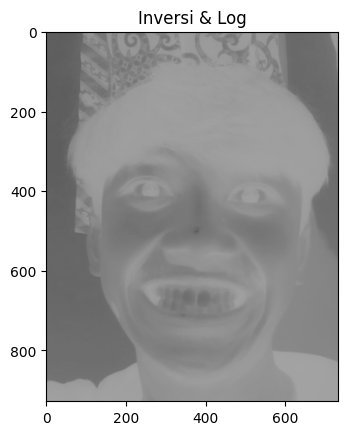

In [23]:
inlog(30)  # Memanggil fungsi `inlog` dengan parameter `30` untuk menerapkan transformasi logaritmik terbalik pada gambar.
plt.imshow(img_inlog)  # Menampilkan gambar hasil transformasi logaritmik terbalik menggunakan fungsi `imshow` dari Matplotlib.
plt.title("Inversi & Log")  # Mengatur judul plot gambar
plt.show()  # Menampilkan plot gambar.

### Nth Power

In [24]:
img_nthpower = np.zeros(img.shape, dtype=np.uint8) # Menyiapkan piksel kosong untuk rekayasa citra

In [25]:
def nthpower(c, y):
    # Menghitung nilai faktor untuk transformasi kuasa dari parameter c dan y
    thc = c / 100
    thy = y / 100    
    # Melakukan iterasi untuk setiap baris (y) dalam gambar
    for y in range(0, img_height):
        # Melakukan iterasi untuk setiap kolom (x) dalam gambar
        for x in range(0, img_width):
            # Mengambil nilai warna merah (red), hijau (green), dan biru (blue) dari gambar pada posisi (y, x)
            red = img[y][x][0]
            green = img[y][x][1]
            blue = img[y][x][2]            
            # Menghitung nilai keabuan (gray) dengan menjumlahkan nilai warna merah, hijau, dan biru, lalu membaginya dengan 3
            gray = (int(red) + int(green) + int(blue)) / 3            
            # Melakukan transformasi kuasa pada nilai keabuan (gray) dengan menggunakan faktor thc dan thy
            gray = int(thc * pow(gray, thy))            
            # Memastikan nilai keabuan (gray) tidak melebihi 255
            if gray > 255:
                gray = 255            
            # Memastikan nilai keabuan (gray) tidak kurang dari 0
            if gray < 0:
                gray = 0            
            # Mengatur piksel gambar pada posisi (y, x) dengan nilai keabuan (gray) yang telah diubah
            img_nthpower[y][x] = (gray, gray, gray)

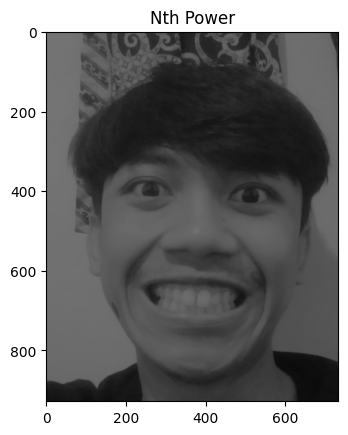

In [26]:
nthpower(50, 100)  # Memanggil fungsi `nthpower` dengan parameter `50` dan `100` untuk menerapkan transformasi kuasa pada gambar.
plt.imshow(img_nthpower)  # Menampilkan gambar hasil transformasi kuasa menggunakan fungsi `imshow` dari Matplotlib.
plt.title("Nth Power")  # Mengatur judul plot gambar
plt.show()  # Menampilkan plot gambar.

### Nth Root Power

In [27]:
img_nthrootpower = np.zeros(img.shape, dtype=np.uint8) # Menyiapkan piksel kosong untuk rekayasa citra

In [28]:
def nthrootpower(c, y):
    # Menghitung nilai faktor untuk transformasi kuasa akar dari parameter c dan y
    thc = c / 100
    thy = y / 100    
    # Melakukan iterasi untuk setiap baris (y) dalam gambar
    for y in range(0, img_height):
        # Melakukan iterasi untuk setiap kolom (x) dalam gambar
        for x in range(0, img_width):
            # Mengambil nilai warna merah (red), hijau (green), dan biru (blue) dari gambar pada posisi (y, x)
            red = img[y][x][0]
            green = img[y][x][1]
            blue = img[y][x][2]            
            # Menghitung nilai keabuan (gray) dengan menjumlahkan nilai warna merah, hijau, dan biru, lalu membaginya dengan 3
            gray = (int(red) + int(green) + int(blue)) / 3            
            # Melakukan transformasi kuasa akar pada nilai keabuan (gray) dengan menggunakan faktor thc dan thy
            gray = int(thc * pow(gray, 1./thy))           
            # Memastikan nilai keabuan (gray) tidak melebihi 255
            if gray > 255:
                gray = 255            
            # Memastikan nilai keabuan (gray) tidak kurang dari 0
            if gray < 0:
                gray = 0            
            # Mengatur piksel gambar pada posisi (y, x) dengan nilai keabuan (gray) yang telah diubah
            img_nthpower[y][x] = (gray, gray, gray)

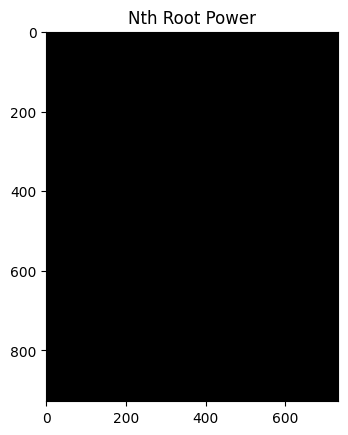

In [29]:
nthrootpower(50, 100)  # Memanggil fungsi `nthrootpower` dengan parameter `50` dan `100` untuk menerapkan transformasi kuasa akar pada gambar.
plt.imshow(img_nthrootpower)  # Menampilkan gambar hasil transformasi kuasa akar menggunakan fungsi `imshow` dari Matplotlib.
plt.title("Nth Root Power")  # Mengatur judul plot gambar
plt.show()  # Menampilkan plot gambar.